
This page contains the SVM code and visualizations done in Python for Text data.


## Importing Libraries

In [205]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS

## Inputing Data
The data consists of Hastags fashiontrends and ecommerce from the Twitter API. 

In [206]:
df1=pd.read_csv('Clean_Twitter_data.csv')
df2 = pd.read_csv('Clean_Twitter_data1.csv')
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,label,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,fashiontrends,What's the outfit tonight? 😏\n⁠\nStreaming Eve...,Whats the outfit tonight \n\nStreaming Everywh...,"['whats', 'the', 'outfit', 'tonight', 'streami...","['whats', 'outfit', 'tonight', 'streaming', 'e...","['what', 'outfit', 'tonight', 'stream', 'every...","['whats', 'outfit', 'tonight', 'streaming', 'e..."
1,fashiontrends,FESTIVE FEATHERS - #fashion #fashionable #fash...,FESTIVE FEATHERS fashion fashionable fashiona...,"['festive', 'feathers', 'fashion', 'fashionabl...","['festive', 'feathers', 'fashion', 'fashionabl...","['festiv', 'feather', 'fashion', 'fashion', 'f...","['festive', 'feather', 'fashion', 'fashionable..."
2,fashiontrends,Our classic cloud slides are the comfiest shoe...,Our classic cloud slides are the comfiest shoe...,"['our', 'classic', 'cloud', 'slides', 'are', '...","['classic', 'cloud', 'slides', 'comfiest', 'sh...","['classic', 'cloud', 'slide', 'comfiest', 'sho...","['classic', 'cloud', 'slide', 'comfiest', 'sho..."
3,fashiontrends,Trendiest Knitwear At Net-A-Porter #fashiontre...,Trendiest Knitwear At NetAPorter fashiontrends...,"['trendiest', 'knitwear', 'at', 'netaporter', ...","['trendiest', 'knitwear', 'netaporter', 'fashi...","['trendiest', 'knitwear', 'netaport', 'fashion...","['trendiest', 'knitwear', 'netaporter', 'fashi..."
4,fashiontrends,"Or like #Celio, a cool, fun-loving and smart o...",Or like Celio a cool funloving and smart one\n...,"['or', 'like', 'celio', 'a', 'cool', 'funlovin...","['like', 'celio', 'cool', 'funloving', 'smart'...","['like', 'celio', 'cool', 'funlov', 'smart', '...","['like', 'celio', 'cool', 'funloving', 'smart'..."


## Cleaning and formatting the dataset to the required format
There are a lot of unwated columns in the dataframe. These columns are dropped from the dataframe, retaining only the necessary columns. The stopwords are removed and the text is tokenized, lemmatized and stemmed. Countvectorizer is applied on the data to convert it to numerical format. Checking the balance of the label is very important before performing svm, as unbalanced dataset may lead to over or underfitting.

In [207]:
df = df[['label','Tweet_lemmatized']]
df.head()

,label,Tweet_lemmatized
0,fashiontrends,"['whats', 'outfit', 'tonight', 'streaming', 'e..."
1,fashiontrends,"['festive', 'feather', 'fashion', 'fashionable..."
2,fashiontrends,"['classic', 'cloud', 'slide', 'comfiest', 'sho..."
3,fashiontrends,"['trendiest', 'knitwear', 'netaporter', 'fashi..."
4,fashiontrends,"['like', 'celio', 'cool', 'funloving', 'smart'..."


In [208]:
final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]
final_tweets[0:5]

['whats outfit tonight streaming everywhere link bio saturday weekend sexpositive weekendmood deephouse techhouse spotify theeveningafter lifestyle fashiontrends styleblogger fashioninspo fashion style model painting makeup fashionblogger ',
 'festive feather fashion fashionable fashionaddict fashionblogger fashionbloggers fashiongram fashionicon fashioninspo fashionista fashionistas fashionlove fashionlovers fashionpost fashionstyle fashiontrends feather festive insta ',
 'classic cloud slide comfiest shoe around shop kat cloud slide today yoru fave color minimal heel fashionrevolution black fashiontrends summerfashion fashioninspo vintagefashion glamour cloudshoes slipper ',
 'trendiest knitwear netaporter fashiontrends via youtube knitwear sweater netaporter fashiontrends',
 'like celio cool funloving smart one trendy fashiontrends lookatme ']

In [209]:
df['final_tweets']=final_tweets

In [210]:
df=df.drop('Tweet_lemmatized',axis=1)
df.head()

,label,final_tweets
0,fashiontrends,whats outfit tonight streaming everywhere link...
1,fashiontrends,festive feather fashion fashionable fashionadd...
2,fashiontrends,classic cloud slide comfiest shoe around shop ...
3,fashiontrends,trendiest knitwear netaporter fashiontrends vi...
4,fashiontrends,like celio cool funloving smart one trendy fas...


In [213]:
X=df['final_tweets'].values
y=df['label'].values

In [214]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

## Model Building
Before building the model, the dataset is split into training and testing sets. The split ratio is 0.75 of the total data in the training set and 0.25 data in the testing set.

In [215]:
import random as rd
MyCV_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25, random_state=111)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dict_values([101, 101])

# What is SVM? 

Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems. Support Vector Machine for Multi-CLass Problems To perform SVM on multi-class problems, we can create a binary classifier for each class of the data. The two results of each classifier will be : The data point belongs to that class or the data point does not belong to that class.

# The Kernel Trick

We use Kernelized SVM for non-linearly separable data. Say, we have some non-linearly separable data in one dimension. We can transform this data into two dimensions and the data will become linearly separable in two dimensions. This is done by mapping each 1-D data point to a corresponding 2-D ordered pair. So for any non-linearly separable data in any dimension, we can just map the data to a higher dimension and then make it linearly separable. This is a very powerful and general transformation. A kernel is nothing but a measure of similarity between data points. The kernel function in a kernelized SVM tells you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space. There are various kernel functions available, but two are very popular :

- Radial Basis Function Kernel (RBF)
The RBF kernel is the most widely used kernel concept to solve the problem of classifying datasets that cannot be separated linearly. This kernel is known to have good performance with certain parameters, and the results of the training have a small error value compared to other kernels. The Gaussian kernel RBF has two parameters, namely gamma and sigma. The gamma parameter has a default value, which is γ = 1 / (2σ) ^ 2. When gamma is high, the points around the data are likely to be considered in the calculation. The sigma parameter is used to find the optimal value for each dataset.

- Polynomial Kernel
A Polynomial Kernel is more generalized form of the linear kernel. In machine learning, the polynomial kernel is a kernel function suitable for use in support vector machines (SVM) and other kernelizations, where the kernel represents the similarity of the training sample vectors in a feature space. Polynomial kernels are also suitable for solving classification problems on normalized training datasets. This kernel is used when data cannot be separated linearly.The polynomial kernel has a degree parameter (d) which functions to find the optimal value in each dataset. The d parameter is the degree of the polynomial kernel function with a default value of d = 2. The greater the d value, the resulting system accuracy will be fluctuating and less stable. This happens because the higher the d parameter value, the more curved the resulting hyperplane line.

- Sigmoid Kernel
The concept of the sigmoid kernel is a development of an artificial neural network (ANN). The Sigmoid kernel has been proposed theoretically for a Support Vector Machine (SVM) because it originates from a neural network, but until now it has not been widely used in practice.The sigmoid kernel is widely applied in neural networks for classification processes. The SVM classification with the sigmoid kernel has a complex structure and it is difficult for humans to interpret and understand how the sigmoid kernel makes classification decisions. Interest in these kernels stems from their success in classifying with the neural netwotk and logistic regression, specific properties, linearity and cumulative distribution.

# Important Parameters in Kernelized SVM:
- The Kernel: The kernel, is selected based on the type of data and also the type of transformation. By default, the kernel is Radial Basis Function Kernel (RBF).

- Gamma : This parameter decides how far the influence of a single training example reaches during transformation, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. If there is a small value of gamma, points farther apart are considered similar. So more points are grouped together and have smoother decision boundaries (maybe less accurate). Larger values of gamma cause points to be closer together (may cause overfitting).

- The C parameter: This parameter controls the amount of regularization applied to the data. Large values of C mean low regularization which in turn causes the training data to fit very well (may cause overfitting). Lower values of C mean higher regularization which causes the model to be more tolerant of errors (may lead to lower accuracy).

The SVM is created using text dataset in Python.The tweets are extracted on the hashtag fashiontrends and hashtag ecommerce. The motive behind collecting this text data was to understand the opinion of people regarding fashion trends and different tweets regarding ecommerce. To keep things simple, we will use the scikit-learn library to generate linearly separable data. 

In [216]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

def svc_param_selection(X, y,k):
    Cs = [ .01, 1, 5, 10]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(SVC(kernel=k), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

## SVM Model 1

This is the first SVM Model. In this model, the kernel is Sigmoid and the accuracy of this model is 96%.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.93      0.96        28

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



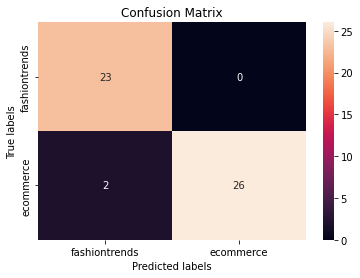

In [220]:
SVM_Model=SVC(kernel='sigmoid', C=0.1, probability=True)
SVM_Model.fit(TrainDF, TrainLabels)

Preds_SVM1 = SVM_Model.predict(TestDF)
Pred_Proba_SVM1 = SVM_Model.predict_proba(TestDF)
SVM_matrix = confusion_matrix(TestLabels, Preds_SVM1)
print(metrics.classification_report(TestLabels, Preds_SVM1))

##Visualise Confusion Matrix
labels = ['fashiontrends', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM1), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

## SVM Model 2

This is the second SVM Model. In this model, the kernel is Polynomial and the accuracy of this model is 75%.

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        23
           1       1.00      0.54      0.70        28

    accuracy                           0.75        51
   macro avg       0.82      0.77      0.74        51
weighted avg       0.84      0.75      0.73        51



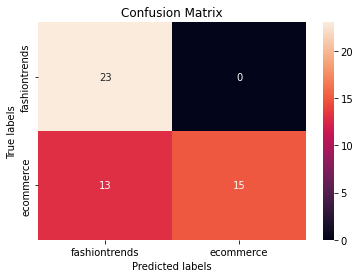

In [221]:
SVM_Model2=SVC(kernel='poly', C=10,probability=True)
SVM_Model2.fit(TrainDF, TrainLabels)

Preds_SVM2 = SVM_Model2.predict(TestDF)
Pred_Proba_SVM2 = SVM_Model2.predict_proba(TestDF)
SVM_matrix = confusion_matrix(TestLabels, Preds_SVM2)
print(metrics.classification_report(TestLabels, Preds_SVM2))

##Visualise Confusion Matrix
labels = ['fashiontrends', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM2), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

## SVM Model 3

This is the third SVM Model. In this model, the kernel is radial and the accuracy of this model is 94%.

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.89      0.94        28

    accuracy                           0.94        51
   macro avg       0.94      0.95      0.94        51
weighted avg       0.95      0.94      0.94        51



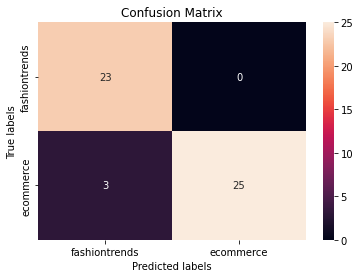

In [225]:
SVM_Model3=SVC(kernel='rbf', C=0.3,probability=True)
SVM_Model3.fit(TrainDF, TrainLabels)

Preds_SVM3 = SVM_Model3.predict(TestDF)
Pred_Proba_SVM3 = SVM_Model3.predict_proba(TestDF)
SVM_matrix3 = confusion_matrix(TestLabels, Preds_SVM3)
print(metrics.classification_report(TestLabels, Preds_SVM3))

##Visualise Confusion Matrix
labels = ['fashiontrends', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_SVM3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

# Conclusion

The SVM model classified tweets generated from Twitter into the hashtag class (fashiontrends and ecommerce) of different tweets. The accuracy of the models are in the range of 75-96% which is pretty high in prediction. With the collection of words, the model is able to predict or classify the tweets into particular classes. The first model,i.e, the sigmoid model is the best model for this data as it has the highest accuracy (96%). 